Dataset - https://www.kaggle.com/usgs/earthquake-database

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('earthquakes.csv')

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [5]:
df.loc[:, 'year'] = pd.to_datetime(df.loc[:, 'Date']).apply(lambda x: x.year)

In [6]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


In [7]:
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [49]:
def plot_scatter_geo(df_year, year, fig, plot=False):
    data = go.Scattergeo(
            lon = df_year['Longitude'],
            lat = df_year['Latitude'],
            text = df_year['Type'],
            mode = 'markers',
            marker = dict(symbol = 'star',size=5,colorscale = 'Reds'
                          ),
            marker_color = df_year['Magnitude'],
            )
    layout = dict(title = f'Earthquake location around the world in year {year}',
                  geo_scope = 'world'
                 )
    if fig is None:
        choromap = go.Figure(data = [data],layout = layout)
    else:
        choromap = fig
        choromap.update(data= [data], layout = layout)
    if plot:
        iplot(choromap)
    return choromap

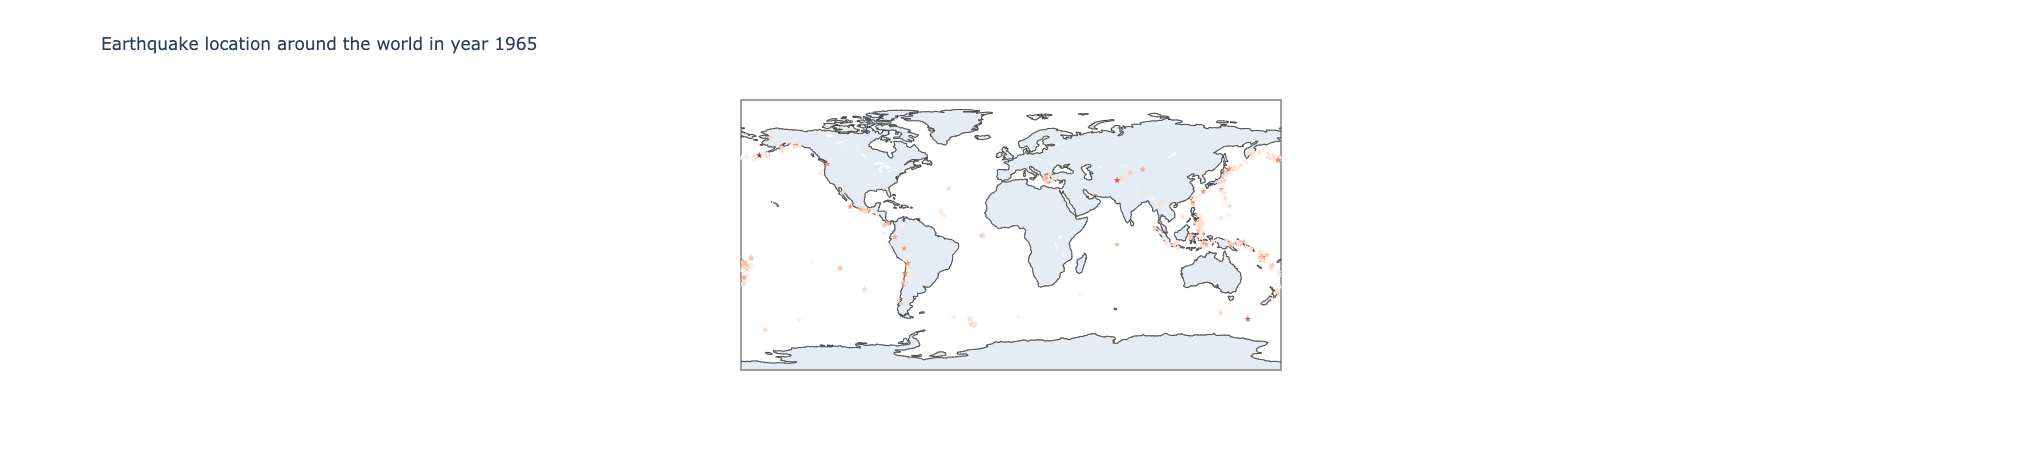

In [50]:
plot_scatter_geo(df[df['year'] == 1965], '1965', None)

Need to install the following-

1. xvfb - `sudo apt-get install xvfb`
2. orca-plotly - `conda install -c plotly plotly-orca`

In [43]:
import plotly.io as pio
pio.orca.config.use_xvfb = True

In [44]:
pio.orca.config.save() 

In [51]:
import time
fig = None
for year in df['year'].unique():
    fig = plot_scatter_geo(df[df['year'] == year], year, fig, plot=False)
    fig.write_image(file=f'earthquakes_plots/{year}.jpg', format='jpg')

The above code generates PNG images for each year. Next we have to combine these in a GIF. For that we will use [ImageMagick software](https://imagemagick.org/). Follow the instructions to install it on your computer. On ubuntu, you can use the instructions [here](https://www.tecmint.com/install-imagemagick-on-debian-ubuntu/). Then run the following commands.

Once you have ImageMagick installed on your system, navigate to the directory that has all the maps we just made (`earthquakes_plots` by default). Now we need to run one line of code to create our gif. Here’s what it does in a nutshell:
* convert: take all these files and change them
* delay 60: set the time that passes between each image before going to the next
* loop 0: set an infinite loop
* <insert all filenames that will be converted>
* my_map.gif
And here’s the code to use in Terminal:
    ```
    convert -delay 60 -loop 0 1965.jpg 1966.jpg 1967.jpg 1968.jpg 1969.jpg 1970.jpg 1971.jpg 1972.jpg 1973.jpg \
        1974.jpg 1975.jpg 1976.jpg 1977.jpg 1978.jpg 1979.jpg 1980.jpg 1981.jpg 1982.jpg 1983.jpg 1984.jpg 1985.jpg \
        1986.jpg 1987.jpg 1988.jpg 1989.jpg 1990.jpg 1991.jpg 1992.jpg 1993.jpg 1994.jpg 1995.jpg 1996.jpg 1997.jpg \
        1998.jpg 1999.jpg 2000.jpg 2001.jpg 2002.jpg 2003.jpg 2004.jpg 2005.jpg 2006.jpg 2007.jpg 2008.jpg 2009.jpg \
        2010.jpg 2011.jpg 2012.jpg 2013.jpg 2014.jpg 2015.jpg 2016.jpg timelapse.gif
    ```

You should now have a timelapse gif of earthquakes around the world from 1965 to 2016 in the timelapse.gif file